Enrique Ulises Báez Gómez Tagle 0241823


Eduardo Aranda Arteaga 0238814


Jorge Barba Pérez 0237328

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, Conv1D, LSTM, GlobalMaxPooling1D, Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


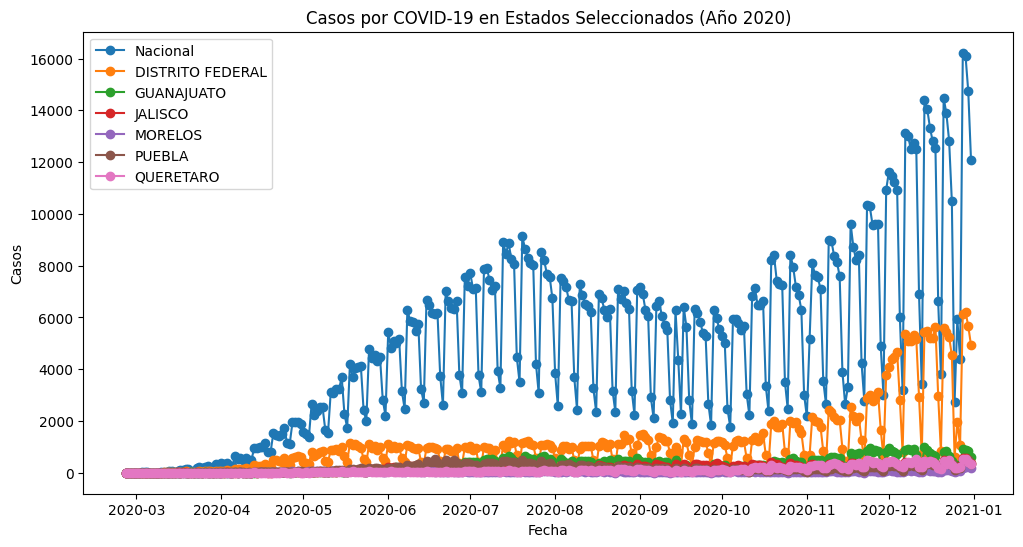

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/MachineLearning/Actividad1/data2.csv')

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]

primer_anno = df[df['date'].dt.year == df['date'].min().year]

datos_2020 = primer_anno[primer_anno['date'].dt.year == 2020]

plt.figure(figsize=(12, 6))

for estado in estados_a_filtrar:
    plt.plot(datos_2020['date'], datos_2020[estado], marker='o', label=estado)

plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.title('Casos por COVID-19 en Estados Seleccionados (Año 2020)')
plt.legend()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/MachineLearning/Actividad1/data.csv')

print(df)


    cve_ent  poblacion               nombre  26-02-2020  27-02-2020  \
0         1    1434635       AGUASCALIENTES           0           0   
1         2    3634868      BAJA CALIFORNIA           0           0   
2         3     804708  BAJA CALIFORNIA SUR           0           0   
3         4    1000617             CAMPECHE           0           0   
4         7    5730367              CHIAPAS           0           0   
5         8    3801487            CHIHUAHUA           0           0   
6         9    9018645     DISTRITO FEDERAL           0           2   
7         5    3218720             COAHUILA           0           0   
8         6     785153               COLIMA           0           0   
9        10    1868996              DURANGO           0           0   
10       11    6228175           GUANAJUATO           0           0   
11       12    3657048             GUERRERO           0           0   
12       13    3086414              HIDALGO           0           1   
13    

In [ ]:
estados_a_filtrar=["Nacional","DISTRITO FEDERAL","GUANAJUATO","JALISCO","MORELOS","PUEBLA","QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]
print(df_filtrado)

    cve_ent  poblacion            nombre  26-02-2020  27-02-2020  28-02-2020  \
6         9    9018645  DISTRITO FEDERAL           0           2           0   
10       11    6228175        GUANAJUATO           0           0           0   
13       14    8409693           JALISCO           0           0           0   
16       17    2044058           MORELOS           0           0           0   
20       21    6604451            PUEBLA           0           0           0   
21       22    2279637         QUERETARO           0           0           0   
32        0  127792286          Nacional           0           4           2   

    29-02-2020  01-03-2020  02-03-2020  03-03-2020  ...  15-06-2023  \
6            0           0           0           1  ...          69   
10           0           1           3           3  ...          19   
13           0           0           0           0  ...          14   
16           0           0           0           0  ...           1   
20  

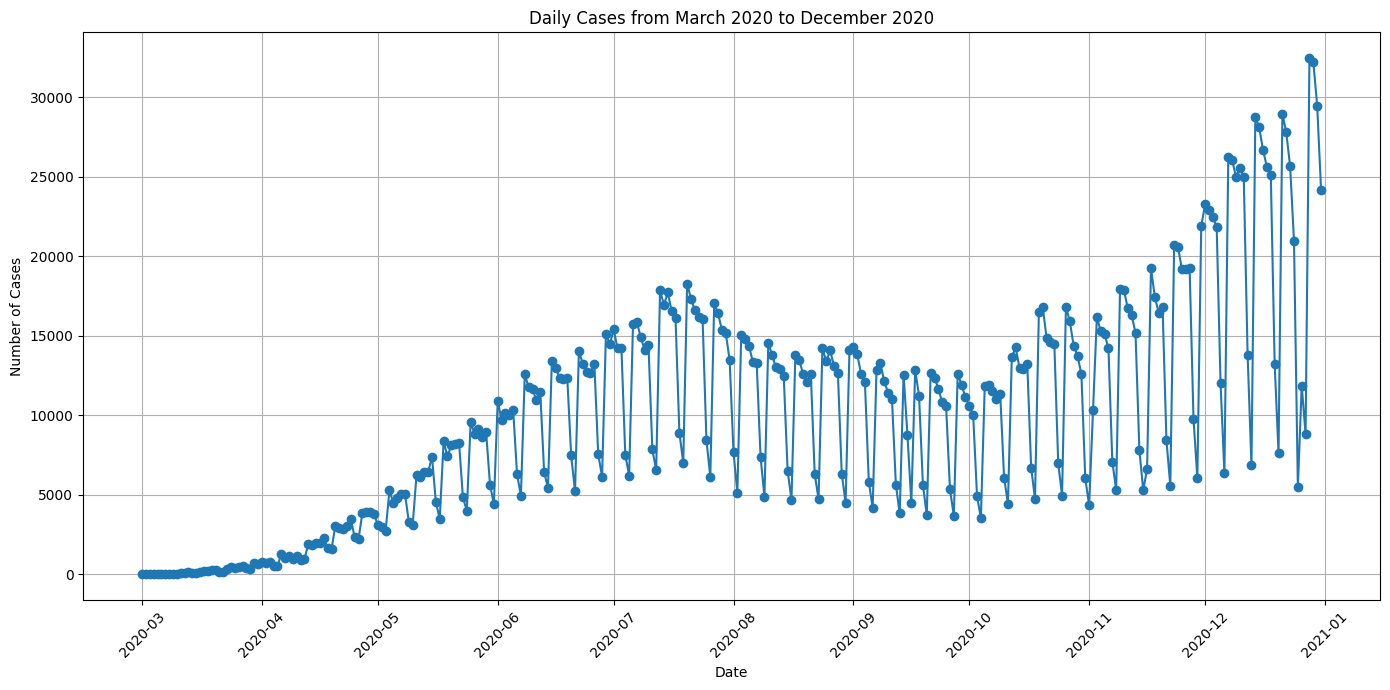

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_transposed = df.set_index(['cve_ent', 'poblacion', 'nombre']).T

df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'date'}, inplace=True)
df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

mask = (df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')
df_filtered = df_transposed.loc[mask]

df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
df_daily = df_filtered_numeric.sum(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(df_filtered['date'], df_daily, marker='o', linestyle='-')
plt.title('Daily Cases from March 2020 to December 2020')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

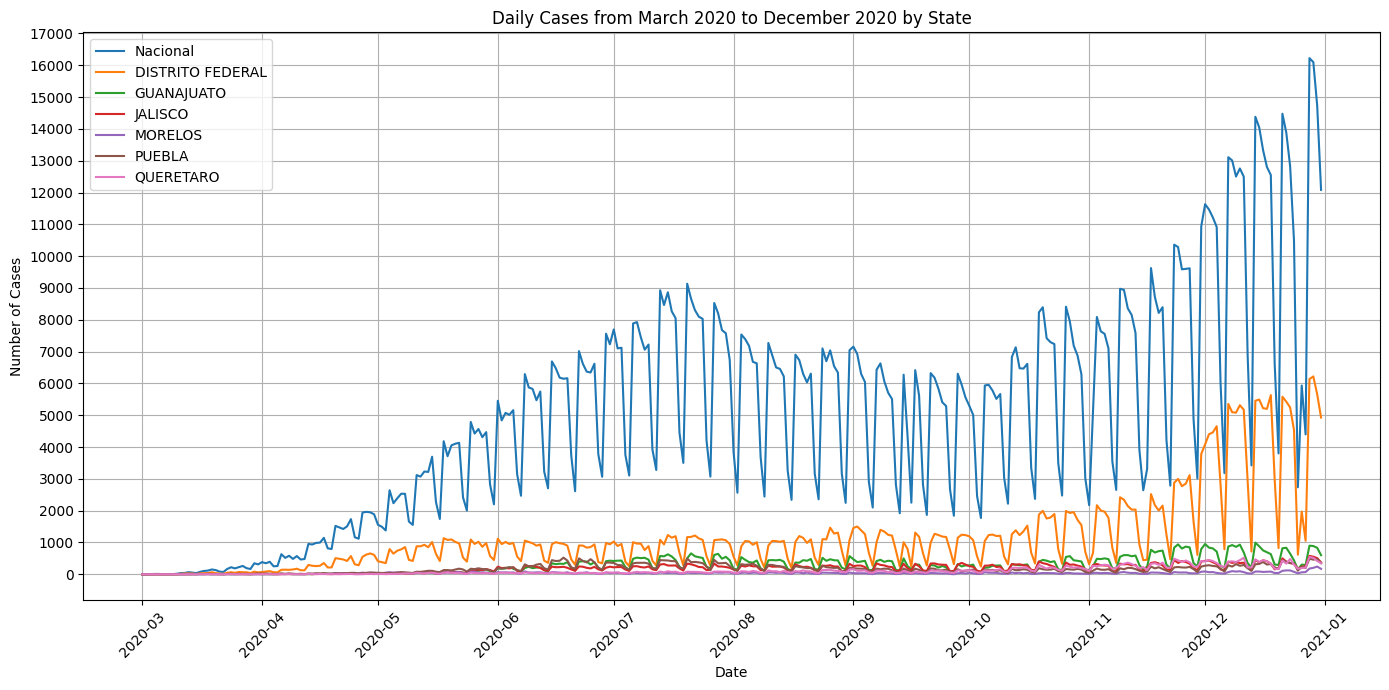

In [ ]:

estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]

plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    plt.plot(df_filtered['date'], df_daily, linestyle='-', label=estado)

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

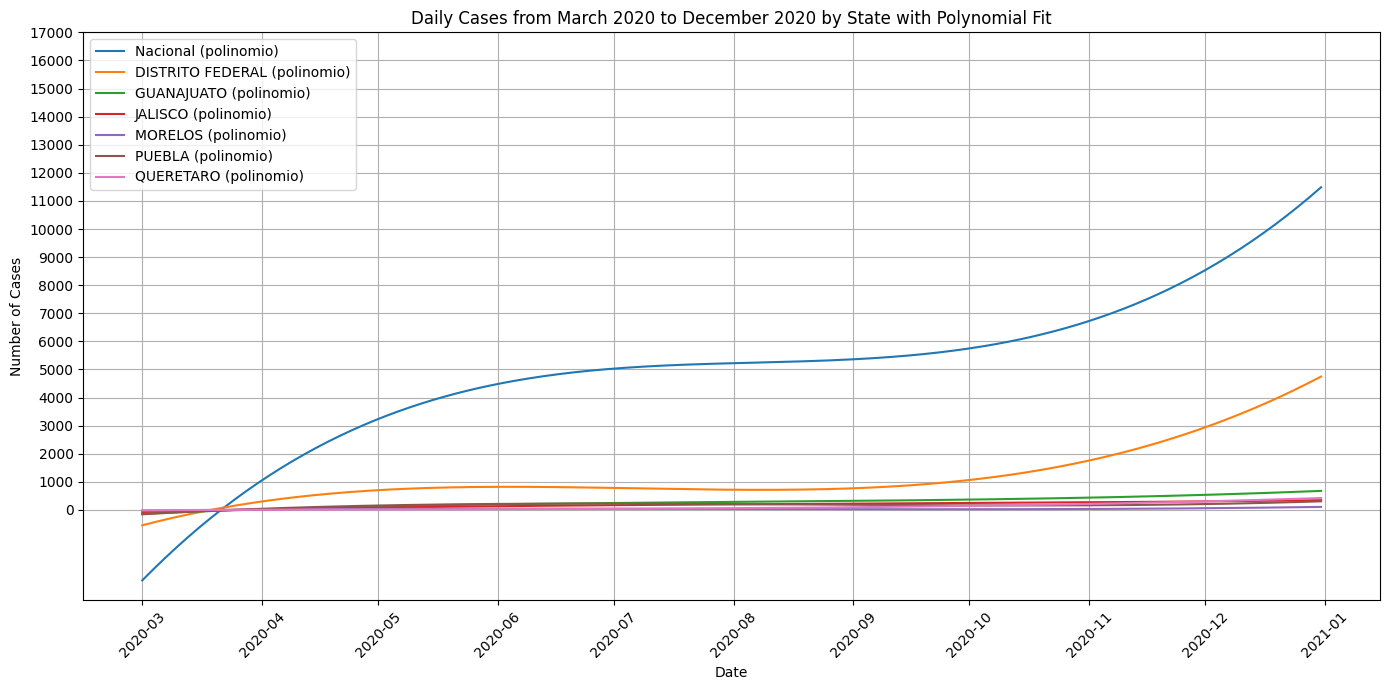

In [ ]:
estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]

plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    x = np.arange(len(df_daily))
    y = df_daily.values
    p = np.polyfit(x, y, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', label=f'{estado} (polinomio)')

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

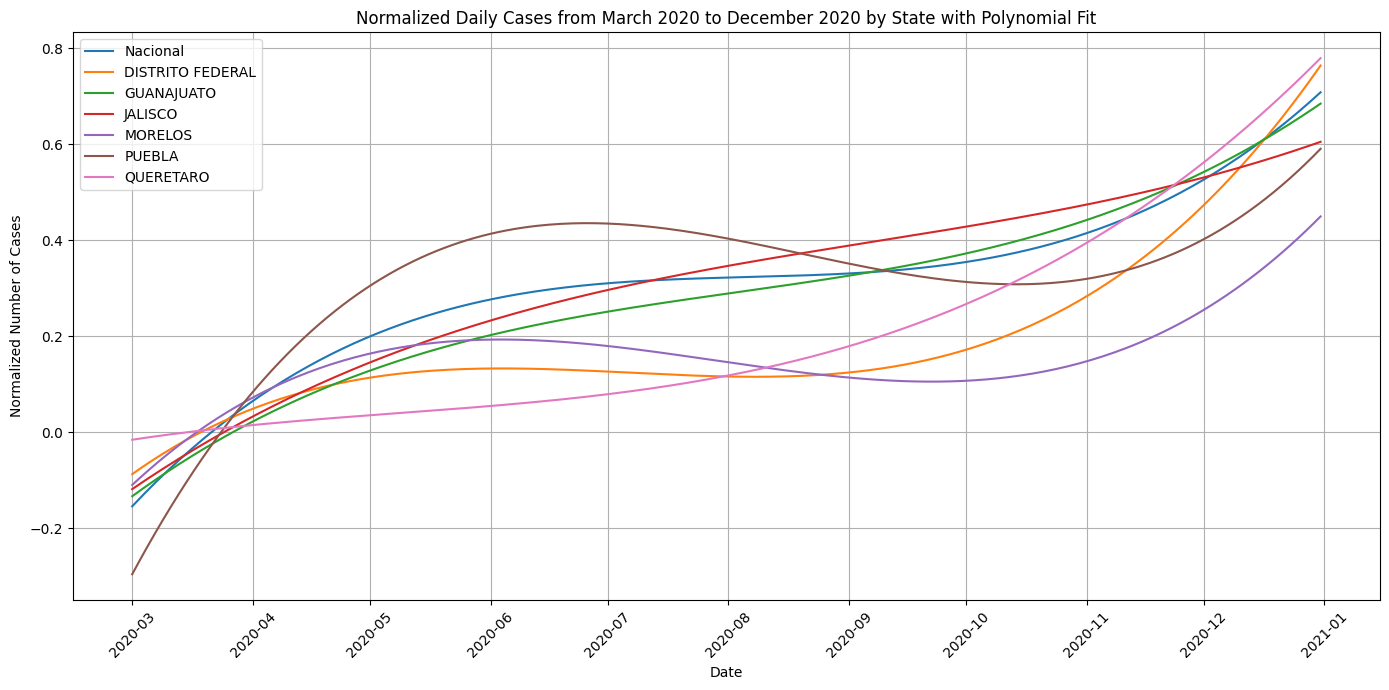

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]

plt.figure(figsize=(14, 7))

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    scaler = MinMaxScaler()
    df_daily_normalized = scaler.fit_transform(df_daily.values.reshape(-1, 1)).flatten()

    x = np.arange(len(df_daily_normalized))
    p = np.polyfit(x, df_daily_normalized, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', label=f'{estado}')

plt.title('Normalized Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Normalized Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()